<a href="https://colab.research.google.com/github/Voolshara/Nti_AI_academy_2020/blob/main/NTI_BaseLine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/AI-Front/NTI/main/semifinals/data/train.jsonl

--2020-12-23 03:52:31--  https://raw.githubusercontent.com/AI-Front/NTI/main/semifinals/data/train.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2930172 (2.8M) [text/plain]
Saving to: ‘train.jsonl’

train.jsonl         100%[===================>]   2.79M  15.5MB/s    in 0.2s    

2020-12-23 03:52:32 (15.5 MB/s) - ‘train.jsonl’ saved [2930172/2930172]



In [ ]:
!wget  https://raw.githubusercontent.com/AI-Front/NTI/main/semifinals/data/val.jsonl

--2020-12-23 03:52:32--  https://raw.githubusercontent.com/AI-Front/NTI/main/semifinals/data/val.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 566932 (554K) [text/plain]
Saving to: ‘val.jsonl’

val.jsonl           100%[===================>] 553.64K  --.-KB/s    in 0.04s   

2020-12-23 03:52:32 (12.5 MB/s) - ‘val.jsonl’ saved [566932/566932]



In [ ]:
!wget  https://raw.githubusercontent.com/Voolshara/DS_NTI/main/test.jsonl

--2020-12-23 03:52:32--  https://raw.githubusercontent.com/Voolshara/DS_NTI/main/test.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1739290 (1.7M) [text/plain]
Saving to: ‘test.jsonl’

test.jsonl          100%[===================>]   1.66M  --.-KB/s    in 0.08s   

2020-12-23 03:52:33 (20.7 MB/s) - ‘test.jsonl’ saved [1739290/1739290]



In [ ]:
!pip install jsonlines

In [ ]:
import json
#import jsonlines
import codecs
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def get_X_y(data_json_file):
    X, y = [], []
    k1, k2 = 0, 0
    with open(data_json_file, 'r') as json_file:
        json_list = list(json_file)
        #print(json_list[0])
        for json_str in json_list:
            item = json.loads(json_str)
            text = item['passage']['text']
            #print(item['passage'].keys())
            questions = item['passage']['questions']
            for q in questions:
                query = q['question']
                ans = q['answers']
                for a in ans:
                    X.append(text+' Query: '+query+' Answer: '+a['text'])
                    y.append(a['label'])
                    if a['label'] == 1:
                      k1 += 1
                    else:
                      k2 += 1
                    
    return X, y, k1, k2

In [ ]:
x, y, o1, o2 = get_X_y("/content/output__2021-01-08T10_50_01.617078 03_00.jsonl")

In [ ]:
print(o1, o2) #640, 680, 

7020 594


In [ ]:
Key_words = []
Key_words_kol = []
for i in range(len(X_train)):
  key = X_train[i][X_train[i].find("Query") + 7:X_train[i].find("Answer") - 1].split()[0]
  if len(key) == 1 or len(key) == 2:
    key = X_train[i][X_train[i].find("Query") + 7:X_train[i].find("Answer") - 1].split()[0] + " " + X_train[i][X_train[i].find("Query") + 7:X_train[i].find("Answer") - 1].split()[1]
  if key in Key_words:
    Key_words_kol[Key_words.index(key)] += 1
  else:
    Key_words.append(key)
    Key_words_kol.append(1)
chet = 0
for i in range(len(Key_words_kol)):
  if Key_words_kol[i] > 150:
    print(Key_words[i], Key_words_kol[i])
    chet += 1
print(chet)    

Где 352
Почему 623
Как 956
Что 1710
Какие 496
Кто 1370
Кого 253
В каком 192
Когда 391
Чем 299
Сколько 517
Куда 163
О чем 173
Какая 177
Какой 292
15


In [ ]:
X_tr_place = X_or_train.copy()
Y_tr_place = Y_or_train.copy()

X_tr_Why = X_or_train.copy()
Y_tr_Why = Y_or_train.copy()

X_tr_What = X_or_train.copy()
Y_tr_What = Y_or_train.copy()

X_tr_How = X_or_train.copy()
Y_tr_How = Y_or_train.copy()

X_tr_Who = X_or_train.copy()
Y_tr_Who = Y_or_train.copy()

X_tr_When = X_or_train.copy()
Y_tr_When = Y_or_train.copy()

X_tr_Many = X_or_train.copy()
Y_tr_Many = Y_or_train.copy()

X_tr_Other = X_or_train.copy()
Y_tr_Other = Y_or_train.copy()
place = 0
why = 0
what = 0
how = 0
who = 0
when = 0
many = 0
other = 0
print(type(X_train))

<class 'list'>


In [ ]:
def key_def(X):
  key = X[X.find("Query") + 7:X.find("Answer") - 1].split()[0]
  if len(key) == 1 or len(key) == 2:
    key = X[X.find("Query") + 7:X.find("Answer") - 1].split()[0] + " " + X[X.find("Query") + 7:X.find("Answer") - 1].split()[1]
  key = key.lower()
  if key[-1] == ',' or key[-1] == " ":
    return key[:-1] 
  if key[-1] == ',' and key[-2] == " ":
    return key[:-2]  
  return key

In [ ]:
print(len(X_train))
for i in range(len(X_train)):
  el = X_train[i]
  key = key_def(el)
  if key == "где" or key == "в каком":
    X_tr_place.append(el)
    Y_tr_place.append(Y_train[i])
  elif key == "почему":
    X_tr_Why.append(el)
    Y_tr_Why.append(Y_train[i])
  elif key == "что" or key == "чем":
    X_tr_What.append(el)
    Y_tr_What.append(Y_train[i])
  elif key == "как":
    X_tr_How.append(el)
    Y_tr_How.append(Y_train[i])
  elif key == "какие" or key == "какой" or key == "какая" or key == "какое" or key == "кто" or key == "каким":
    X_tr_Who.append(el)
    Y_tr_Who.append(Y_train[i])
  elif key == "когда":
    X_tr_When.append(el)
    Y_tr_When.append(Y_train[i])
  elif key == "сколько":
    X_tr_Many.append(el)
    Y_tr_Many.append(Y_train[i])        
  else:
    X_tr_Other.append(el)
    Y_tr_Other.append(Y_train[i])     
print(len(X_tr_place), len(X_tr_Why), len(X_tr_What), len(X_tr_How), len(X_tr_Who), len(X_tr_When), len(X_tr_Many), len(X_tr_Other), "Train DS")

11950
12499 12583 13996 12916 14545 12346 12467 16198 Train DS


In [ ]:
X_train, Y_train = X_test, Y_test
print(len(X_train))
for i in range(len(X_train)):
  el = X_train[i]
  key = key_def(el)
  if key == "где" or key == "в каком":
    place += 1
    X_tr_place.append(el)
    Y_tr_place.append(Y_train[i])
  elif key == "почему":
    why += 1
    X_tr_Why.append(el)
    Y_tr_Why.append(Y_train[i])
  elif key == "что" or key == "чем":
    what += 1
    X_tr_What.append(el)
    Y_tr_What.append(Y_train[i])
  elif key == "как":
    how += 1
    X_tr_How.append(el)
    Y_tr_How.append(Y_train[i])
  elif key == "какие" or key == "какой" or key == "какая" or key == "какое" or key == "кто" or key == "каким":
    who += 1
    X_tr_Who.append(el)
    Y_tr_Who.append(Y_train[i])
  elif key == "когда":
    when += 1
    X_tr_When.append(el)
    Y_tr_When.append(Y_train[i])
  elif key == "сколько":
    many += 1
    X_tr_Many.append(el)
    Y_tr_Many.append(Y_train[i])        
  else:
    other += 1
    X_tr_Other.append(el)
    Y_tr_Other.append(Y_train[i])     
print(place, why, what, how, who, when, many, other)
print(len(X_tr_place), len(X_tr_Why), len(X_tr_What), len(X_tr_How), len(X_tr_Who), len(X_tr_When), len(X_tr_Many), len(X_tr_Other), "Test DS")


2235
111 152 338 204 530 46 69 785
12610 12735 14334 13120 15075 12392 12536 16983 Test DS


In [ ]:
rs = 42
koef = 0.9

clf1 = LogisticRegression(random_state=rs)   
clf2 = RandomForestClassifier(random_state=rs, n_jobs =-1)
clf3 = SGDClassifier()
clf4 = SVC(random_state =rs)
clf5 = DecisionTreeClassifier(random_state=rs)
clf6 =  SVC(class_weight="balanced", random_state =rs)
clf7 = DecisionTreeClassifier()
clf8 = ExtraTreeClassifier()
clflist = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]

In [ ]:
X_train = X_tr_place[:len(X_tr_place) - int(koef * len(X_tr_place))]
X_test = X_tr_place[len(X_tr_place) - int(koef * len(X_tr_place)):]
Y_train = Y_tr_place[:len(Y_tr_place) - int(koef * len(Y_tr_place))]
Y_test = Y_tr_place[len(Y_tr_place) - int(koef * len(Y_tr_place)):]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Precision:   0.27
Recall:   0.50
F1-measure:   0.35
Accuracy:   0.55
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      6230
           1       0.00      0.00      0.00      5119

    accuracy                           0.55     11349
   macro avg       0.27      0.50      0.35     11349
weighted avg       0.30      0.55      0.39     11349



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


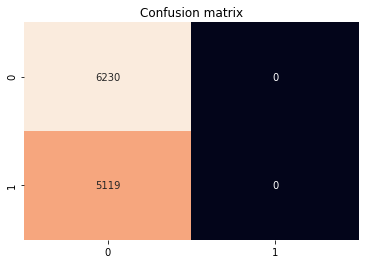

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Precision:   0.51
Recall:   0.51
F1-measure:   0.50
Accuracy:   0.50
              precision    recall  f1-score   support

           0       0.55      0.47      0.51      6230
           1       0.46      0.54      0.50      5119

    accuracy                           0.50     11349
   macro avg       0.51      0.51      0.50     11349
weighted avg       0.51      0.50      0.50     11349



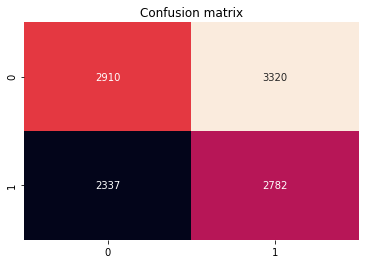

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Precision:   0.55
Recall:   0.50
F1-measure:   0.36
Accuracy:   0.55
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      6230
           1       0.56      0.00      0.01      5119

    accuracy                           0.55     11349
   macro avg       0.55      0.50      0.36     11349
weighted avg       0.55      0.55      0.39     11349



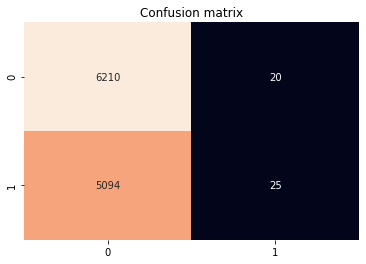

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.27
Recall:   0.50
F1-measure:   0.35
Accuracy:   0.55
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      6230
           1       0.00      0.00      0.00      5119

    accuracy                           0.55     11349
   macro avg       0.27      0.50      0.35     11349
weighted avg       0.30      0.55      0.39     11349



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


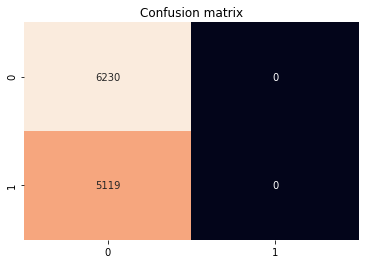

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Precision:   0.50
Recall:   0.50
F1-measure:   0.48
Accuracy:   0.49
              precision    recall  f1-score   support

           0       0.55      0.35      0.43      6230
           1       0.45      0.65      0.53      5119

    accuracy                           0.49     11349
   macro avg       0.50      0.50      0.48     11349
weighted avg       0.51      0.49      0.48     11349



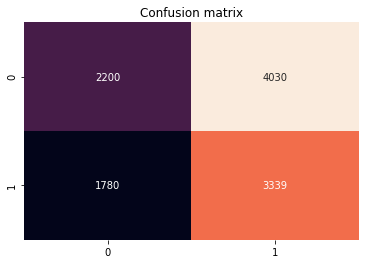

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.43
Accuracy:   0.47
              precision    recall  f1-score   support

           0       0.56      0.18      0.27      6230
           1       0.45      0.83      0.59      5119

    accuracy                           0.47     11349
   macro avg       0.50      0.50      0.43     11349
weighted avg       0.51      0.47      0.41     11349



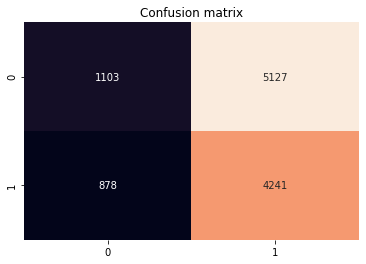

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Precision:   0.50
Recall:   0.50
F1-measure:   0.49
Accuracy:   0.49
              precision    recall  f1-score   support

           0       0.55      0.43      0.48      6230
           1       0.45      0.57      0.50      5119

    accuracy                           0.49     11349
   macro avg       0.50      0.50      0.49     11349
weighted avg       0.50      0.49      0.49     11349



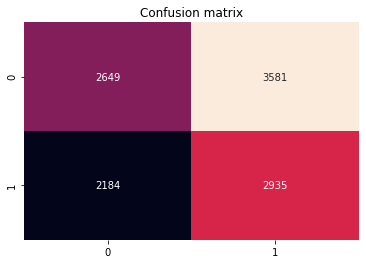

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.56      0.56      6230
           1       0.45      0.44      0.45      5119

    accuracy                           0.51     11349
   macro avg       0.50      0.50      0.50     11349
weighted avg       0.51      0.51      0.51     11349



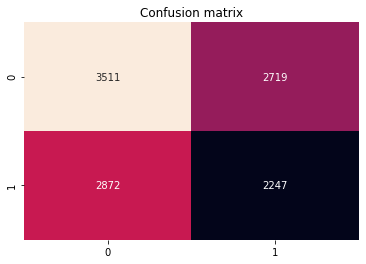

In [ ]:
for classif in clflist:
    clf_place = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=10000)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf_place', classif),
    ])
    clf_place.fit(X_train, Y_train)
    predictions = clf_place.predict(X_test)
    print(classif)
    print("Precision: {0:6.2f}".format(precision_score(Y_test, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(Y_test, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(Y_test, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(Y_test, predictions)))
    print(classification_report(Y_test, predictions))
    labels = clf_place.classes_
    sns.heatmap(data=confusion_matrix(Y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
X_train = X_tr_Why[:len(X_tr_Why) - int(koef * len(X_tr_Why))]
X_test = X_tr_Why[len(X_tr_Why) - int(koef * len(X_tr_Why)):]
Y_train = Y_tr_Why[:len(Y_tr_Why) - int(koef * len(Y_tr_Why))]
Y_test = Y_tr_Why[len(Y_tr_Why) - int(koef * len(Y_tr_Why)):]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      6278
           1       0.46      0.43      0.44      5183

    accuracy                           0.51     11461
   macro avg       0.50      0.50      0.50     11461
weighted avg       0.51      0.51      0.51     11461



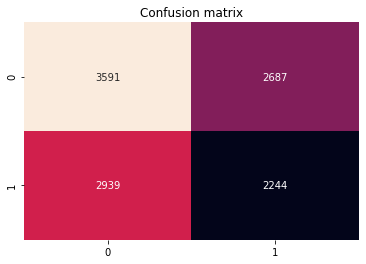

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      6278
           1       0.46      0.43      0.44      5183

    accuracy                           0.51     11461
   macro avg       0.50      0.50      0.50     11461
weighted avg       0.51      0.51      0.51     11461



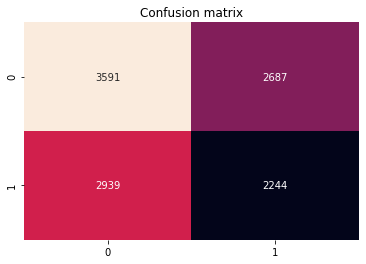

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      6278
           1       0.46      0.43      0.44      5183

    accuracy                           0.51     11461
   macro avg       0.50      0.50      0.50     11461
weighted avg       0.51      0.51      0.51     11461



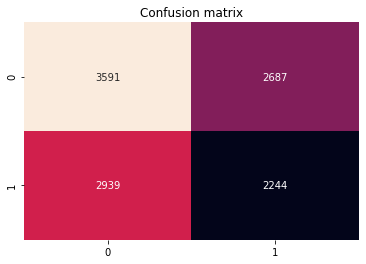

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      6278
           1       0.46      0.43      0.44      5183

    accuracy                           0.51     11461
   macro avg       0.50      0.50      0.50     11461
weighted avg       0.51      0.51      0.51     11461



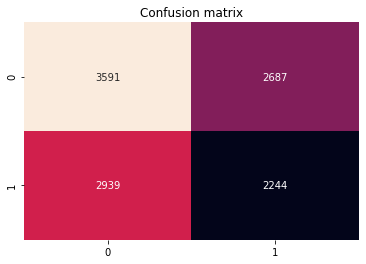

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      6278
           1       0.46      0.43      0.44      5183

    accuracy                           0.51     11461
   macro avg       0.50      0.50      0.50     11461
weighted avg       0.51      0.51      0.51     11461



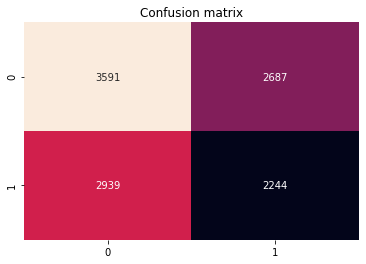

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      6278
           1       0.46      0.43      0.44      5183

    accuracy                           0.51     11461
   macro avg       0.50      0.50      0.50     11461
weighted avg       0.51      0.51      0.51     11461



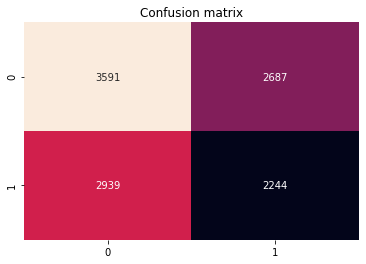

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      6278
           1       0.46      0.43      0.44      5183

    accuracy                           0.51     11461
   macro avg       0.50      0.50      0.50     11461
weighted avg       0.51      0.51      0.51     11461



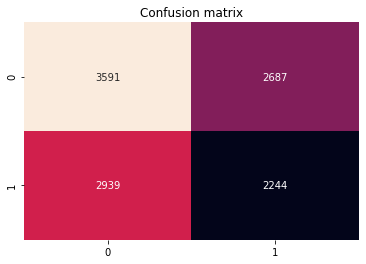

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.50
              precision    recall  f1-score   support

           0       0.55      0.47      0.50      6278
           1       0.45      0.53      0.49      5183

    accuracy                           0.50     11461
   macro avg       0.50      0.50      0.50     11461
weighted avg       0.50      0.50      0.50     11461



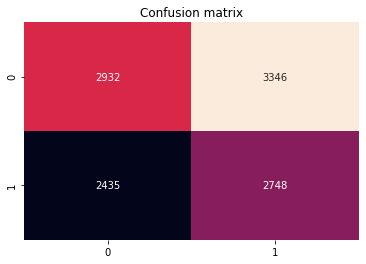

In [ ]:
for classif in clflist:
    clf_Why = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=10000)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf_Why', classif),
    ])
    clf_Why.fit(X_train, Y_train)
    predictions = clf_place.predict(X_test)
    print(classif)
    print("Precision: {0:6.2f}".format(precision_score(Y_test, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(Y_test, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(Y_test, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(Y_test, predictions)))
    print(classification_report(Y_test, predictions))
    labels = clf_Why.classes_
    sns.heatmap(data=confusion_matrix(Y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
X_train = X_tr_What[:len(X_tr_What) - int(koef * len(X_tr_What))]
X_test = X_tr_What[len(X_tr_What) - int(koef * len(X_tr_What)):]
Y_train = Y_tr_What[:len(Y_tr_What) - int(koef * len(Y_tr_What))]
Y_test = Y_tr_What[len(Y_tr_What) - int(koef * len(Y_tr_What)):]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.50
              precision    recall  f1-score   support

           0       0.54      0.48      0.51      7029
           1       0.46      0.52      0.49      5871

    accuracy                           0.50     12900
   macro avg       0.50      0.50      0.50     12900
weighted avg       0.50      0.50      0.50     12900



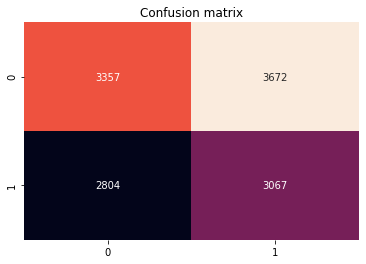

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.50
              precision    recall  f1-score   support

           0       0.54      0.48      0.51      7029
           1       0.46      0.52      0.49      5871

    accuracy                           0.50     12900
   macro avg       0.50      0.50      0.50     12900
weighted avg       0.50      0.50      0.50     12900



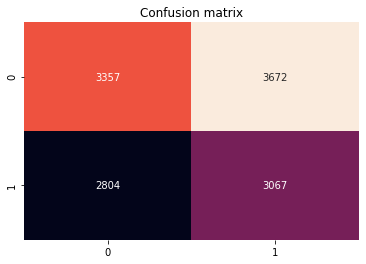

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.50
              precision    recall  f1-score   support

           0       0.54      0.48      0.51      7029
           1       0.46      0.52      0.49      5871

    accuracy                           0.50     12900
   macro avg       0.50      0.50      0.50     12900
weighted avg       0.50      0.50      0.50     12900



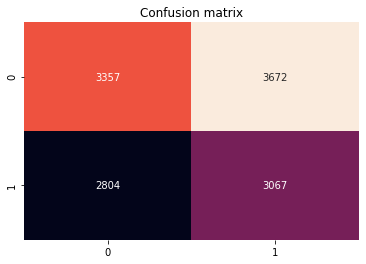

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.50
              precision    recall  f1-score   support

           0       0.54      0.48      0.51      7029
           1       0.46      0.52      0.49      5871

    accuracy                           0.50     12900
   macro avg       0.50      0.50      0.50     12900
weighted avg       0.50      0.50      0.50     12900



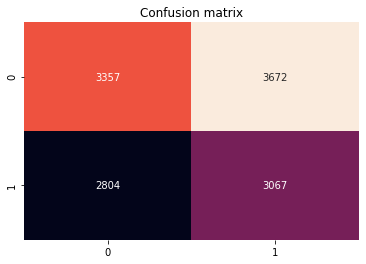

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.50
              precision    recall  f1-score   support

           0       0.54      0.48      0.51      7029
           1       0.46      0.52      0.49      5871

    accuracy                           0.50     12900
   macro avg       0.50      0.50      0.50     12900
weighted avg       0.50      0.50      0.50     12900



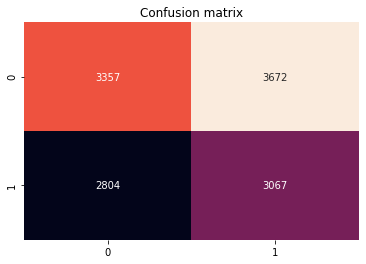

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.50
              precision    recall  f1-score   support

           0       0.54      0.48      0.51      7029
           1       0.46      0.52      0.49      5871

    accuracy                           0.50     12900
   macro avg       0.50      0.50      0.50     12900
weighted avg       0.50      0.50      0.50     12900



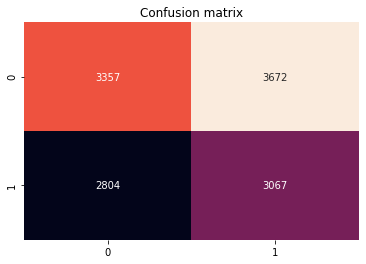

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.50
              precision    recall  f1-score   support

           0       0.54      0.48      0.51      7029
           1       0.46      0.52      0.49      5871

    accuracy                           0.50     12900
   macro avg       0.50      0.50      0.50     12900
weighted avg       0.50      0.50      0.50     12900



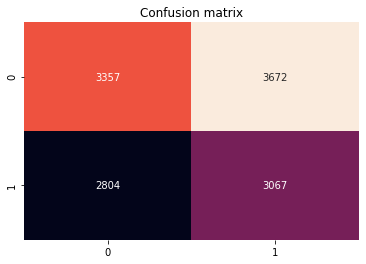

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.54      0.61      0.57      7029
           1       0.45      0.39      0.42      5871

    accuracy                           0.51     12900
   macro avg       0.50      0.50      0.50     12900
weighted avg       0.50      0.51      0.50     12900



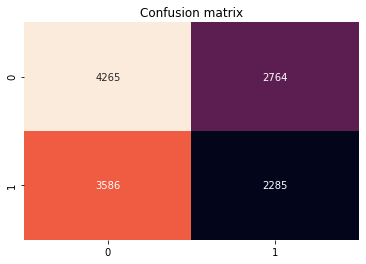

In [ ]:
for classif in clflist:
    clf_What = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=10000)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf_What', classif),
    ])
    clf_What.fit(X_train, Y_train)
    predictions = clf_place.predict(X_test)
    print(classif)
    print("Precision: {0:6.2f}".format(precision_score(Y_test, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(Y_test, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(Y_test, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(Y_test, predictions)))
    print(classification_report(Y_test, predictions))
    labels = clf_What.classes_
    sns.heatmap(data=confusion_matrix(Y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
X_train = X_tr_How[:len(X_tr_How) - int(koef * len(X_tr_How))]
X_test = X_tr_How[len(X_tr_How) - int(koef * len(X_tr_How)):]
Y_train = Y_tr_How[:len(Y_tr_How) - int(koef * len(Y_tr_How))]
Y_test = Y_tr_How[len(Y_tr_How) - int(koef * len(Y_tr_How)):]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      6473
           1       0.45      0.39      0.42      5335

    accuracy                           0.51     11808
   macro avg       0.50      0.50      0.50     11808
weighted avg       0.50      0.51      0.50     11808



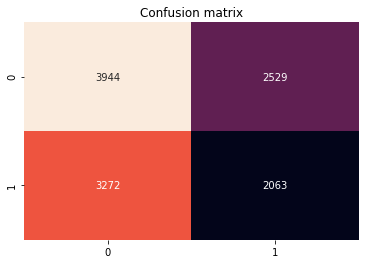

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      6473
           1       0.45      0.39      0.42      5335

    accuracy                           0.51     11808
   macro avg       0.50      0.50      0.50     11808
weighted avg       0.50      0.51      0.50     11808



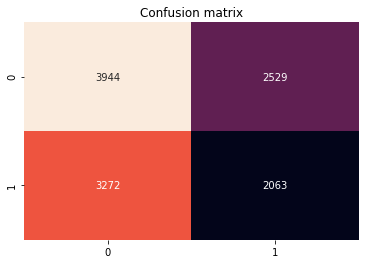

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      6473
           1       0.45      0.39      0.42      5335

    accuracy                           0.51     11808
   macro avg       0.50      0.50      0.50     11808
weighted avg       0.50      0.51      0.50     11808



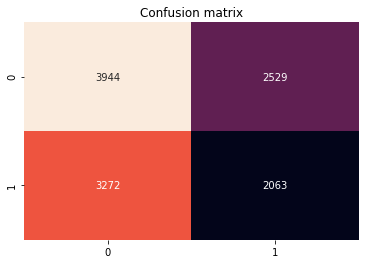

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      6473
           1       0.45      0.39      0.42      5335

    accuracy                           0.51     11808
   macro avg       0.50      0.50      0.50     11808
weighted avg       0.50      0.51      0.50     11808



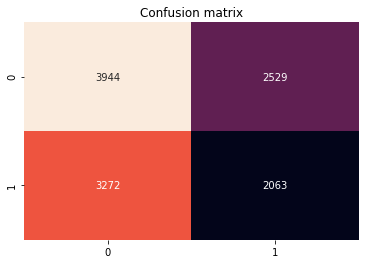

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      6473
           1       0.45      0.39      0.42      5335

    accuracy                           0.51     11808
   macro avg       0.50      0.50      0.50     11808
weighted avg       0.50      0.51      0.50     11808



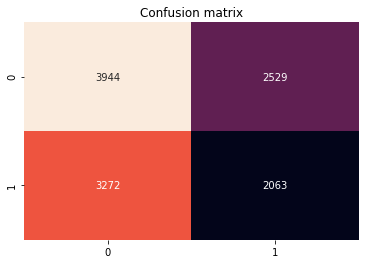

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      6473
           1       0.45      0.39      0.42      5335

    accuracy                           0.51     11808
   macro avg       0.50      0.50      0.50     11808
weighted avg       0.50      0.51      0.50     11808



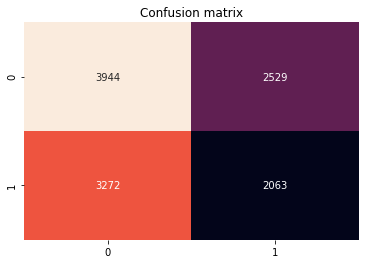

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      6473
           1       0.45      0.39      0.42      5335

    accuracy                           0.51     11808
   macro avg       0.50      0.50      0.50     11808
weighted avg       0.50      0.51      0.50     11808



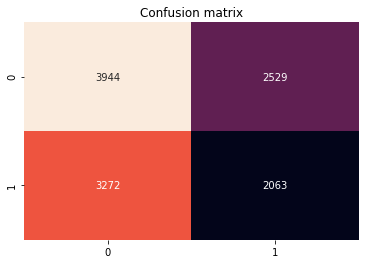

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')
Precision:   0.51
Recall:   0.50
F1-measure:   0.43
Accuracy:   0.54
              precision    recall  f1-score   support

           0       0.55      0.89      0.68      6473
           1       0.46      0.12      0.19      5335

    accuracy                           0.54     11808
   macro avg       0.51      0.50      0.43     11808
weighted avg       0.51      0.54      0.46     11808



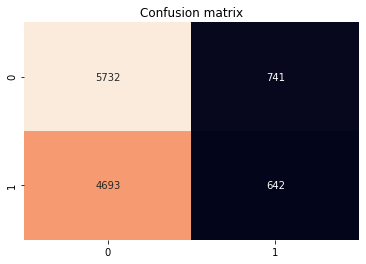

In [ ]:
for classif in clflist:
    clf_How = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=10000)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf_How', classif),
    ])
    clf_How.fit(X_train, Y_train)
    predictions = clf_place.predict(X_test)
    print(classif)
    print("Precision: {0:6.2f}".format(precision_score(Y_test, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(Y_test, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(Y_test, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(Y_test, predictions)))
    print(classification_report(Y_test, predictions))
    labels = clf_How.classes_
    sns.heatmap(data=confusion_matrix(Y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
X_train = X_tr_Who[:len(X_tr_Who) - int(koef * len(X_tr_Who))]
X_test = X_tr_Who[len(X_tr_Who) - int(koef * len(X_tr_Who)):]
Y_train = Y_tr_Who[:len(Y_tr_Who) - int(koef * len(Y_tr_Who))]
Y_test = Y_tr_Who[len(Y_tr_Who) - int(koef * len(Y_tr_Who)):]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Precision:   0.51
Recall:   0.50
F1-measure:   0.43
Accuracy:   0.54
              precision    recall  f1-score   support

           0       0.55      0.89      0.68      7437
           1       0.47      0.11      0.18      6130

    accuracy                           0.54     13567
   macro avg       0.51      0.50      0.43     13567
weighted avg       0.51      0.54      0.46     13567



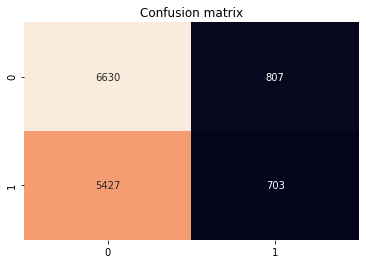

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Precision:   0.51
Recall:   0.50
F1-measure:   0.43
Accuracy:   0.54
              precision    recall  f1-score   support

           0       0.55      0.89      0.68      7437
           1       0.47      0.11      0.18      6130

    accuracy                           0.54     13567
   macro avg       0.51      0.50      0.43     13567
weighted avg       0.51      0.54      0.46     13567



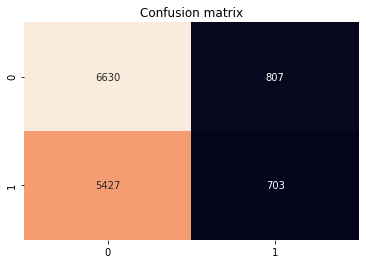

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Precision:   0.51
Recall:   0.50
F1-measure:   0.43
Accuracy:   0.54
              precision    recall  f1-score   support

           0       0.55      0.89      0.68      7437
           1       0.47      0.11      0.18      6130

    accuracy                           0.54     13567
   macro avg       0.51      0.50      0.43     13567
weighted avg       0.51      0.54      0.46     13567



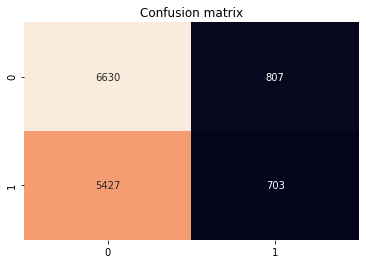

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.51
Recall:   0.50
F1-measure:   0.43
Accuracy:   0.54
              precision    recall  f1-score   support

           0       0.55      0.89      0.68      7437
           1       0.47      0.11      0.18      6130

    accuracy                           0.54     13567
   macro avg       0.51      0.50      0.43     13567
weighted avg       0.51      0.54      0.46     13567



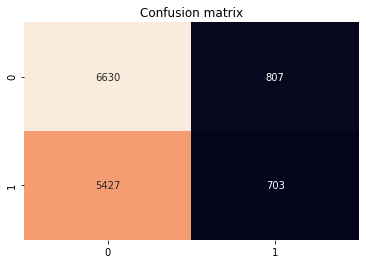

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Precision:   0.51
Recall:   0.50
F1-measure:   0.43
Accuracy:   0.54
              precision    recall  f1-score   support

           0       0.55      0.89      0.68      7437
           1       0.47      0.11      0.18      6130

    accuracy                           0.54     13567
   macro avg       0.51      0.50      0.43     13567
weighted avg       0.51      0.54      0.46     13567



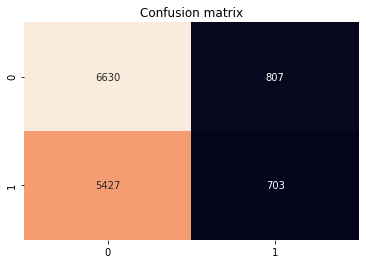

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.51
Recall:   0.50
F1-measure:   0.43
Accuracy:   0.54
              precision    recall  f1-score   support

           0       0.55      0.89      0.68      7437
           1       0.47      0.11      0.18      6130

    accuracy                           0.54     13567
   macro avg       0.51      0.50      0.43     13567
weighted avg       0.51      0.54      0.46     13567



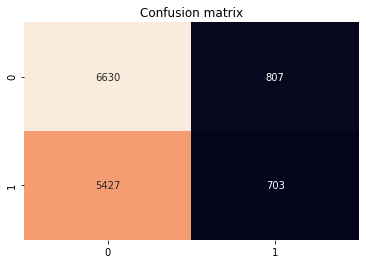

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Precision:   0.51
Recall:   0.50
F1-measure:   0.43
Accuracy:   0.54
              precision    recall  f1-score   support

           0       0.55      0.89      0.68      7437
           1       0.47      0.11      0.18      6130

    accuracy                           0.54     13567
   macro avg       0.51      0.50      0.43     13567
weighted avg       0.51      0.54      0.46     13567



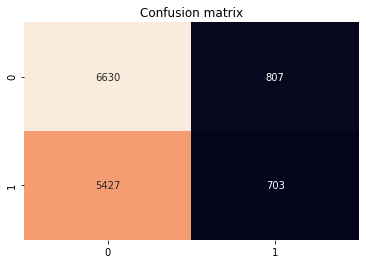

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')
Precision:   0.51
Recall:   0.50
F1-measure:   0.39
Accuracy:   0.46
              precision    recall  f1-score   support

           0       0.56      0.10      0.17      7437
           1       0.45      0.90      0.60      6130

    accuracy                           0.46     13567
   macro avg       0.51      0.50      0.39     13567
weighted avg       0.51      0.46      0.37     13567



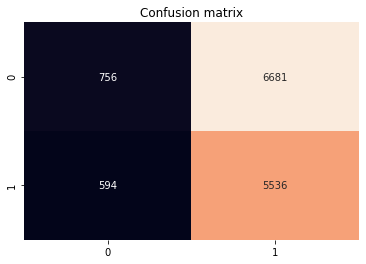

In [ ]:
for classif in clflist:
    clf_Who = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=10000)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf_Who', classif),
    ])
    clf_Who.fit(X_train, Y_train)
    predictions = clf_place.predict(X_test)
    print(classif)
    print("Precision: {0:6.2f}".format(precision_score(Y_test, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(Y_test, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(Y_test, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(Y_test, predictions)))
    print(classification_report(Y_test, predictions))
    labels = clf_Who.classes_
    sns.heatmap(data=confusion_matrix(Y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
X_train = X_tr_When[:len(X_tr_When) - int(koef * len(X_tr_When))]
X_test = X_tr_When[len(X_tr_When) - int(koef * len(X_tr_When)):]
Y_train = Y_tr_When[:len(Y_tr_When) - int(koef * len(Y_tr_When))]
Y_test = Y_tr_When[len(Y_tr_When) - int(koef * len(Y_tr_When)):]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Precision:   0.51
Recall:   0.50
F1-measure:   0.39
Accuracy:   0.46
              precision    recall  f1-score   support

           0       0.56      0.11      0.18      6111
           1       0.45      0.90      0.60      5041

    accuracy                           0.46     11152
   macro avg       0.51      0.50      0.39     11152
weighted avg       0.51      0.46      0.37     11152



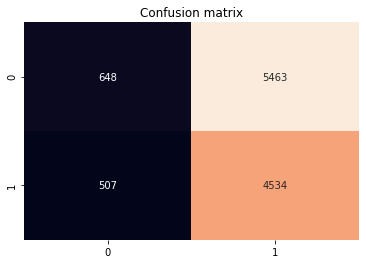

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Precision:   0.51
Recall:   0.50
F1-measure:   0.39
Accuracy:   0.46
              precision    recall  f1-score   support

           0       0.56      0.11      0.18      6111
           1       0.45      0.90      0.60      5041

    accuracy                           0.46     11152
   macro avg       0.51      0.50      0.39     11152
weighted avg       0.51      0.46      0.37     11152



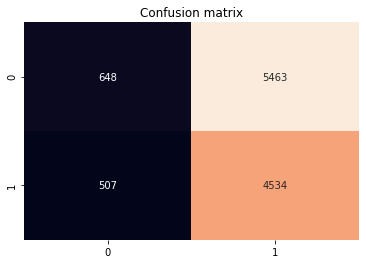

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Precision:   0.51
Recall:   0.50
F1-measure:   0.39
Accuracy:   0.46
              precision    recall  f1-score   support

           0       0.56      0.11      0.18      6111
           1       0.45      0.90      0.60      5041

    accuracy                           0.46     11152
   macro avg       0.51      0.50      0.39     11152
weighted avg       0.51      0.46      0.37     11152



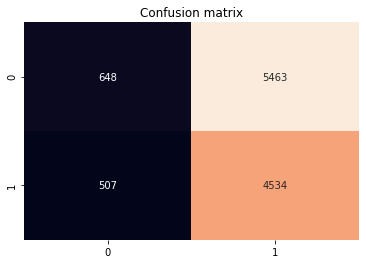

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.51
Recall:   0.50
F1-measure:   0.39
Accuracy:   0.46
              precision    recall  f1-score   support

           0       0.56      0.11      0.18      6111
           1       0.45      0.90      0.60      5041

    accuracy                           0.46     11152
   macro avg       0.51      0.50      0.39     11152
weighted avg       0.51      0.46      0.37     11152



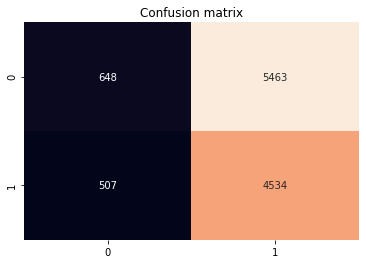

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Precision:   0.51
Recall:   0.50
F1-measure:   0.39
Accuracy:   0.46
              precision    recall  f1-score   support

           0       0.56      0.11      0.18      6111
           1       0.45      0.90      0.60      5041

    accuracy                           0.46     11152
   macro avg       0.51      0.50      0.39     11152
weighted avg       0.51      0.46      0.37     11152



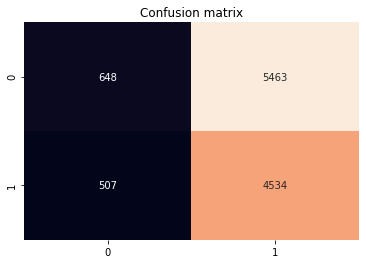

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.51
Recall:   0.50
F1-measure:   0.39
Accuracy:   0.46
              precision    recall  f1-score   support

           0       0.56      0.11      0.18      6111
           1       0.45      0.90      0.60      5041

    accuracy                           0.46     11152
   macro avg       0.51      0.50      0.39     11152
weighted avg       0.51      0.46      0.37     11152



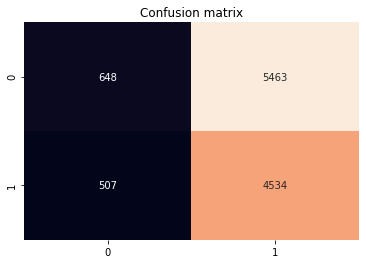

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Precision:   0.51
Recall:   0.50
F1-measure:   0.39
Accuracy:   0.46
              precision    recall  f1-score   support

           0       0.56      0.11      0.18      6111
           1       0.45      0.90      0.60      5041

    accuracy                           0.46     11152
   macro avg       0.51      0.50      0.39     11152
weighted avg       0.51      0.46      0.37     11152



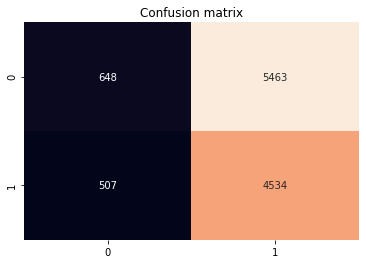

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')
Precision:   0.50
Recall:   0.50
F1-measure:   0.49
Accuracy:   0.52
              precision    recall  f1-score   support

           0       0.55      0.71      0.62      6111
           1       0.46      0.29      0.35      5041

    accuracy                           0.52     11152
   macro avg       0.50      0.50      0.49     11152
weighted avg       0.51      0.52      0.50     11152



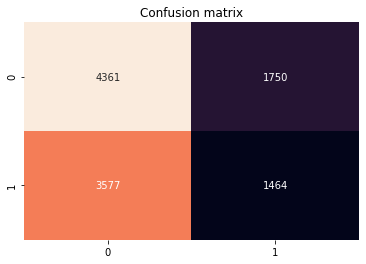

In [ ]:
for classif in clflist:
    clf_When = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=10000)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf_When', classif),
    ])
    clf_When.fit(X_train, Y_train)
    predictions = clf_place.predict(X_test)
    print(classif)
    print("Precision: {0:6.2f}".format(precision_score(Y_test, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(Y_test, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(Y_test, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(Y_test, predictions)))
    print(classification_report(Y_test, predictions))
    labels = clf_When.classes_
    sns.heatmap(data=confusion_matrix(Y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
X_train = X_tr_Many[:len(X_tr_Many) - int(koef * len(X_tr_Many))]
X_test = X_tr_Many[len(X_tr_Many) - int(koef * len(X_tr_Many)):]
Y_train = Y_tr_Many[:len(Y_tr_Many) - int(koef * len(Y_tr_Many))]
Y_test = Y_tr_Many[len(Y_tr_Many) - int(koef * len(Y_tr_Many)):]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.49
Accuracy:   0.52
              precision    recall  f1-score   support

           0       0.55      0.72      0.62      6188
           1       0.45      0.29      0.35      5094

    accuracy                           0.52     11282
   macro avg       0.50      0.50      0.49     11282
weighted avg       0.51      0.52      0.50     11282



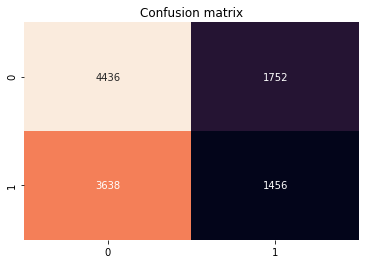

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.49
Accuracy:   0.52
              precision    recall  f1-score   support

           0       0.55      0.72      0.62      6188
           1       0.45      0.29      0.35      5094

    accuracy                           0.52     11282
   macro avg       0.50      0.50      0.49     11282
weighted avg       0.51      0.52      0.50     11282



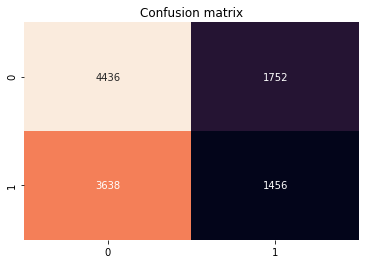

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.49
Accuracy:   0.52
              precision    recall  f1-score   support

           0       0.55      0.72      0.62      6188
           1       0.45      0.29      0.35      5094

    accuracy                           0.52     11282
   macro avg       0.50      0.50      0.49     11282
weighted avg       0.51      0.52      0.50     11282



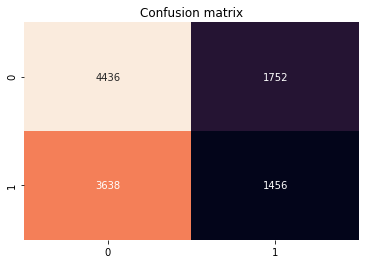

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.49
Accuracy:   0.52
              precision    recall  f1-score   support

           0       0.55      0.72      0.62      6188
           1       0.45      0.29      0.35      5094

    accuracy                           0.52     11282
   macro avg       0.50      0.50      0.49     11282
weighted avg       0.51      0.52      0.50     11282



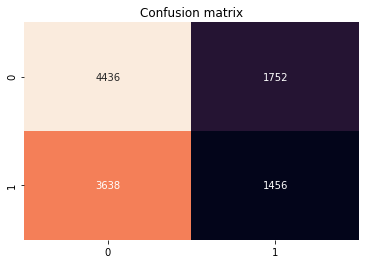

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Precision:   0.50
Recall:   0.50
F1-measure:   0.49
Accuracy:   0.52
              precision    recall  f1-score   support

           0       0.55      0.72      0.62      6188
           1       0.45      0.29      0.35      5094

    accuracy                           0.52     11282
   macro avg       0.50      0.50      0.49     11282
weighted avg       0.51      0.52      0.50     11282



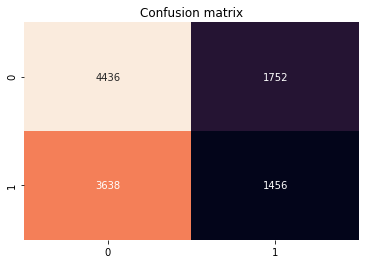

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.49
Accuracy:   0.52
              precision    recall  f1-score   support

           0       0.55      0.72      0.62      6188
           1       0.45      0.29      0.35      5094

    accuracy                           0.52     11282
   macro avg       0.50      0.50      0.49     11282
weighted avg       0.51      0.52      0.50     11282



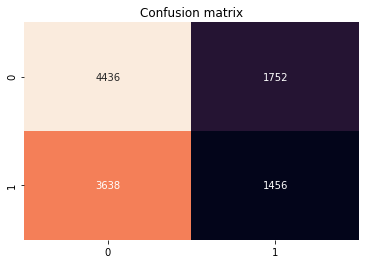

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Precision:   0.50
Recall:   0.50
F1-measure:   0.49
Accuracy:   0.52
              precision    recall  f1-score   support

           0       0.55      0.72      0.62      6188
           1       0.45      0.29      0.35      5094

    accuracy                           0.52     11282
   macro avg       0.50      0.50      0.49     11282
weighted avg       0.51      0.52      0.50     11282



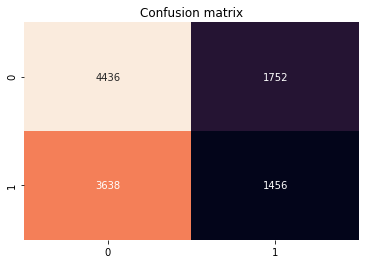

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')
Precision:   0.50
Recall:   0.50
F1-measure:   0.40
Accuracy:   0.46
              precision    recall  f1-score   support

           0       0.55      0.12      0.20      6188
           1       0.45      0.88      0.60      5094

    accuracy                           0.46     11282
   macro avg       0.50      0.50      0.40     11282
weighted avg       0.51      0.46      0.38     11282



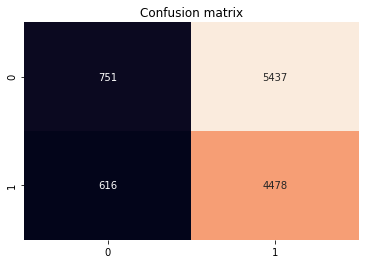

In [ ]:
for classif in clflist:
    clf_Many = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=10000)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf_Many', classif),
    ])
    clf_Many.fit(X_train, Y_train)
    predictions = clf_place.predict(X_test)
    print(classif)
    print("Precision: {0:6.2f}".format(precision_score(Y_test, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(Y_test, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(Y_test, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(Y_test, predictions)))
    print(classification_report(Y_test, predictions))
    labels = clf_Many.classes_
    sns.heatmap(data=confusion_matrix(Y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
X_train = X_tr_Other[:len(X_tr_Other) - int(koef * len(X_tr_Other))]
X_test = X_tr_Other[len(X_tr_Other) - int(koef * len(X_tr_Other)):]
Y_train = Y_tr_Other[:len(Y_tr_Other) - int(koef * len(Y_tr_Other))]
Y_test = Y_tr_Other[len(Y_tr_Other) - int(koef * len(Y_tr_Other)):]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.41
Accuracy:   0.47
              precision    recall  f1-score   support

           0       0.56      0.14      0.22      8392
           1       0.45      0.87      0.59      6892

    accuracy                           0.47     15284
   macro avg       0.50      0.50      0.41     15284
weighted avg       0.51      0.47      0.39     15284



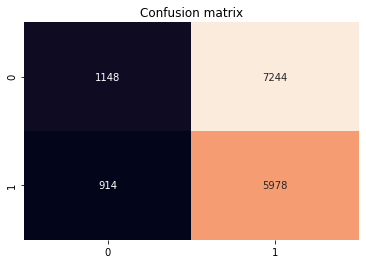

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.41
Accuracy:   0.47
              precision    recall  f1-score   support

           0       0.56      0.14      0.22      8392
           1       0.45      0.87      0.59      6892

    accuracy                           0.47     15284
   macro avg       0.50      0.50      0.41     15284
weighted avg       0.51      0.47      0.39     15284



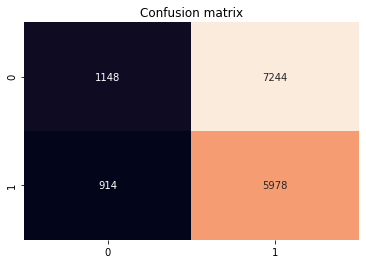

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.41
Accuracy:   0.47
              precision    recall  f1-score   support

           0       0.56      0.14      0.22      8392
           1       0.45      0.87      0.59      6892

    accuracy                           0.47     15284
   macro avg       0.50      0.50      0.41     15284
weighted avg       0.51      0.47      0.39     15284



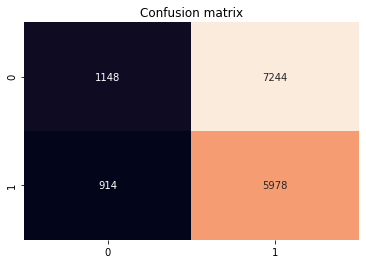

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.41
Accuracy:   0.47
              precision    recall  f1-score   support

           0       0.56      0.14      0.22      8392
           1       0.45      0.87      0.59      6892

    accuracy                           0.47     15284
   macro avg       0.50      0.50      0.41     15284
weighted avg       0.51      0.47      0.39     15284



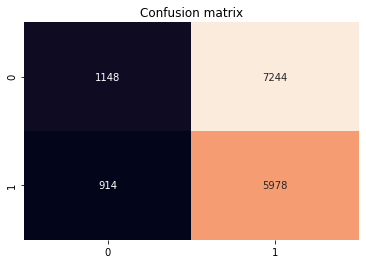

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Precision:   0.50
Recall:   0.50
F1-measure:   0.41
Accuracy:   0.47
              precision    recall  f1-score   support

           0       0.56      0.14      0.22      8392
           1       0.45      0.87      0.59      6892

    accuracy                           0.47     15284
   macro avg       0.50      0.50      0.41     15284
weighted avg       0.51      0.47      0.39     15284



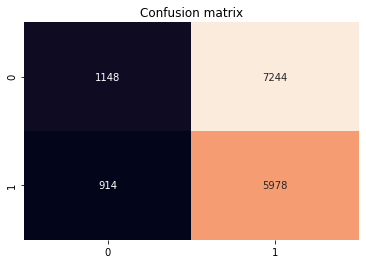

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.50
Recall:   0.50
F1-measure:   0.41
Accuracy:   0.47
              precision    recall  f1-score   support

           0       0.56      0.14      0.22      8392
           1       0.45      0.87      0.59      6892

    accuracy                           0.47     15284
   macro avg       0.50      0.50      0.41     15284
weighted avg       0.51      0.47      0.39     15284



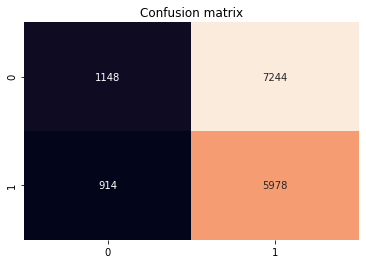

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Precision:   0.50
Recall:   0.50
F1-measure:   0.41
Accuracy:   0.47
              precision    recall  f1-score   support

           0       0.56      0.14      0.22      8392
           1       0.45      0.87      0.59      6892

    accuracy                           0.47     15284
   macro avg       0.50      0.50      0.41     15284
weighted avg       0.51      0.47      0.39     15284



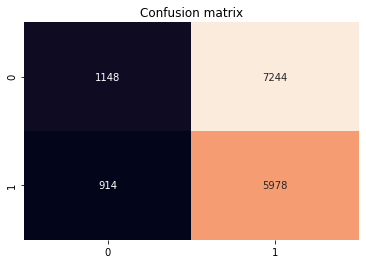

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')
Precision:   0.50
Recall:   0.50
F1-measure:   0.50
Accuracy:   0.51
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      8392
           1       0.45      0.43      0.44      6892

    accuracy                           0.51     15284
   macro avg       0.50      0.50      0.50     15284
weighted avg       0.51      0.51      0.51     15284



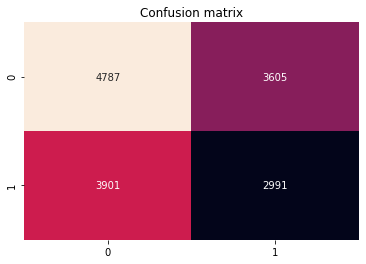

In [ ]:
for classif in clflist:
    clf_Other = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=10000)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf_Other', classif),
    ])
    clf_Other.fit(X_train, Y_train)
    predictions = clf_place.predict(X_test)
    print(classif)
    print("Precision: {0:6.2f}".format(precision_score(Y_test, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(Y_test, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(Y_test, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(Y_test, predictions)))
    print(classification_report(Y_test, predictions))
    labels = clf_Other.classes_
    sns.heatmap(data=confusion_matrix(Y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
def get_X(data_json_file):
    X = []
    with open(data_json_file, 'r') as json_file:
        json_list = list(json_file)
        #print(json_list[0])
        for json_str in json_list:
            item = json.loads(json_str)
            text = item['passage']['text']
            #print(item['passage'].keys())
            questions = item['passage']['questions']
            for q in questions:
                query = q['question']
                ans = q['answers']
                for a in ans:
                    X.append(text+' Query: '+query+' Answer: '+a['text'])
    return X

In [ ]:
X_predict = get_X('test.jsonl')
print(X_predict[0])

"(1) Издательство Viking Press совместно с компанией TradeMobile выпустят мобильное приложение, посвященное Анне Франк, передает The Daily Telegraph. (2) Программа будет включать в себя фрагменты из дневника Анны, озвученные британской актрисой Хеленой Бонэм Картер. (3) Помимо этого, в приложение войдут фотографии и видеозаписи, документы из архива Фонда Анны Франк, план здания в Амстердаме, где Анна с семьей скрывались от нацистов, и факсимильные копии страниц дневника. (4) Приложение, которое получит название Anne Frank App, выйдет 18 октября. (5) Интерфейс программы будет англоязычным. (6) На каких платформах будет доступно Anne Frank App, не уточняется. Анна Франк родилась в Германии в 1929 году. (7) Когда в стране начались гонения на евреев, Анна с семьей перебрались в Нидерланды. (8) С 1942 года члены семьи Франк и еще несколько человек скрывались от нацистов в потайных комнатах дома в Амстердаме, который занимала компания отца Анны. (9) В 1944 году группу по доносу обнаружили ге

In [ ]:
def rez(ind):
  if int(ind) == 0:
    return 1
  return 0    

In [ ]:
def pred(X):
  key = X[X.find("Query") + 7:X.find("Answer") - 1].split()[0]
  if len(key) == 1 or len(key) == 2:
    key = X[X.find("Query") + 7:X.find("Answer") - 1].split()[0] + " " + X[X.find("Query") + 7:X.find("Answer") - 1].split()[1]
  key = key.lower() 
  if key == "где" or key == "в каком":
    R = clf_place.predict([X])
  elif key == "почему":
    R = clf_Why.predict([X])
  elif key == "что" or key == "чем":
    R = clf_What.predict([X])
  elif key == "как":
    R = clf_How.predict([X])
  elif key == "какие" or key == "какой" or key == "какая" or key == "какое" or key == "кто" or key == "каким":
    R = clf_Who.predict([X])
  elif key == "когда":
    R = clf_When.predict([X])
  elif key == "сколько":
    R = clf_Many.predict([X])   
  else:
    R = clf_Other.predict([X]) 
  return int(*R)  

In [ ]:
All_Dict = []
i = 0
with jsonlines.open('test.jsonl') as reader:
    for jsn in reader:
        Main_Dict = dict()
        passage = jsn["passage"]
        Main_Dict['idx'] = jsn["idx"]
        Passage = dict()
        Passage["text"] = str(passage["text"])
        out2_arr = []
        for ques in passage["questions"]:
            qu = dict()
            qu["question"] = str(ques["question"])
            answers = ques["answers"]
            out3_arr = []
            for el in answers:
                out3 = dict()
                out3["idx"] = el["idx"]
                out3["text"] = str(el["text"])
                out3["label"] = int(pred(X_predict[i]))
                out3_arr.append(out3)
                i += 1
            qu["answers"] = out3_arr
            qu["idx"] = ques["idx"]
            out2_arr.append(qu)
        Passage["questions"] = out2_arr
        Main_Dict["passage"] = Passage
        jn = str(Main_Dict)
        #print(jn)
        All_Dict.append(Main_Dict)
with jsonlines.open('output.jsonl', 'w') as writer:
    writer.write_all(All_Dict)